In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import gensim
from nltk.corpus import stopwords
import re

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Downloads\\archive\\spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df=df.loc[:,['v1','v2']]
df=df.rename(columns={'v1':'category','v2':'text'})
df.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# setting spam=0 and ham=1

In [5]:
df['category']=df['category'].apply(lambda x: 0 if x=='spam' else 1)
df.head()

,category,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['category'].value_counts()

category
1    4825
0     747
Name: count, dtype: int64

# Removing all the other characters/symbols other than alphabets 

In [7]:
df['text']=df['text'].apply(lambda x: re.sub('[^a-zA-z]',' ',x))
df['text']=df['text'].apply(lambda x: ' '.join(x.split()))
df.head()

,category,text
0,1,Go until jurong point crazy Available only in ...
1,1,Ok lar Joking wif u oni
2,0,Free entry in a wkly comp to win FA Cup final ...
3,1,U dun say so early hor U c already then say
4,1,Nah I don t think he goes to usf he lives arou...


# Performing the Lemmatization 

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)])

In [22]:
df['text']=df['text'].apply(lambda x: lemmatize(x))
df.head()

,category,text
0,1,Go jurong point crazy Available bugis n great ...
1,1,Ok lar Joking wif u oni
2,0,Free entry wkly comp win FA Cup final tkts st ...
3,1,U dun say early hor U c already say
4,1,Nah I think go usf life around though


# Removing the stopwords

In [23]:
df['text']=df['text'].apply(lambda x: ' '.join([y for y in nltk.word_tokenize(x) if y not in stopwords.words('english')]))
df.head()

,category,text
0,1,Go jurong point crazy Available bugis n great ...
1,1,Ok lar Joking wif u oni
2,0,Free entry wkly comp win FA Cup final tkts st ...
3,1,U dun say early hor U c already say
4,1,Nah I think go usf life around though


In [31]:
ham_data=df[df['category']==1]
spam_data=df[df['category']==0]

In [45]:
ham_text=ham_data['text'].apply(lambda x:' '.join(word for word in nltk.word_tokenize(x))).tolist()
spam_text=spam_data['text'].apply(lambda x:' '.join(word for word in nltk.word_tokenize(x))).tolist()
ham_text=' '.join(ham_text)
spam_text=' '.join(spam_text)

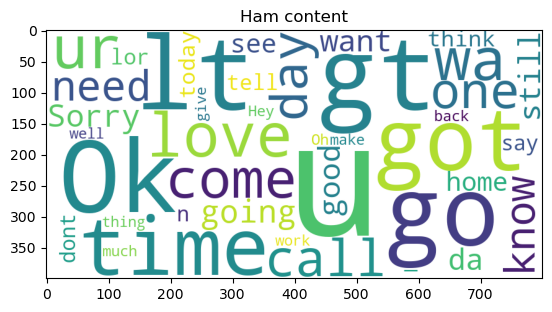

In [54]:
from wordcloud import WordCloud
wordcloud=WordCloud(max_words=40,background_color='white', width=800,height=400)
plt.imshow(wordcloud.generate(ham_text))
plt.title('Ham content')
plt.show()

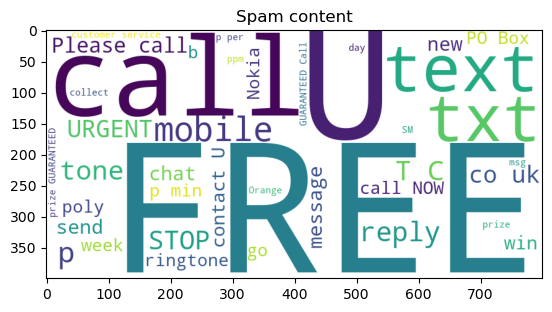

In [55]:
plt.imshow(wordcloud.generate(spam_text))
plt.title('Spam content')
plt.show()

In [56]:
x=df.drop(['category'],axis=1)
y=df['category']

Performing Train Test split 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
X_train['text']=X_train['text'].str.lower()
X_test['text']=X_test['text'].str.lower()


# Invoking Bag of words 

In [13]:
X_train=X_train['text'].tolist()
X_test=X_test['text'].tolist()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_train_bow=cv.fit_transform(X_train).toarray()
X_test_bow=cv.transform(X_test).toarray()

In [15]:
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Invoking machine learning models

In [16]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [17]:
def model_testing(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print('the accuracy of {} is {}'.format(model,accuracy_score(y_test,pred)))

In [18]:
model_testing(gnb,X_train_bow,y_train,X_test_bow,y_test)
model_testing(bnb,X_train_bow,y_train,X_test_bow,y_test)
model_testing(mnb,X_train_bow,y_train,X_test_bow,y_test)

the accuracy of GaussianNB() is 0.8789237668161435
the accuracy of BernoulliNB() is 0.97847533632287
the accuracy of MultinomialNB() is 0.9829596412556054


In [19]:
mnb.fit(X_train_bow,y_train)
model_train=mnb.predict(X_train_bow)
model_test=mnb.predict(X_test_bow)
print('training accuracy{}'.format(accuracy_score(y_train,model_train)))
print('training accuracy{}'.format(accuracy_score(y_test,model_test)))

training accuracy0.9925959165357864
training accuracy0.9829596412556054


# Multinomial Navie Bayes is perfoming the best without overfitting 

In [20]:
x['text']=x['text'].str.lower()
x=x['text'].tolist()


In [21]:
x_bow=cv.fit_transform(x).toarray()
model=mnb.fit(x_bow,y)


# Testing our model with random text 

In [42]:
def spam_or_ham(text):
    text=re.sub('[^a-zA-Z]',' ',text)
    text=text.lower()
    text=' '.join(word for word in nltk.word_tokenize(text) if word not in stopwords.words('english'))
    lemm_text=[' '.join(lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text))]
    bow_form=cv.transform(lemm_text).toarray()
    prediction=model.predict(bow_form)
    return prediction
pred=spam_or_ham('Free entry in 2 a wkly comp to win FA Cup fina')

In [43]:
if pred==1:
    print('This is a ham mail')
else:
        print('This is a spam mail')

This is a spam mail


In [28]:
import pickle
pickle.dump(cv, open('bag of words .pkl','wb'))
pickle.dump(model,open('model_mnb_spam_ham.pkl','wb'))

# saving these models as pickle file